In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
df_index=pd.read_csv("economic_index.csv")

In [13]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [19]:
# drop unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [21]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [29]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

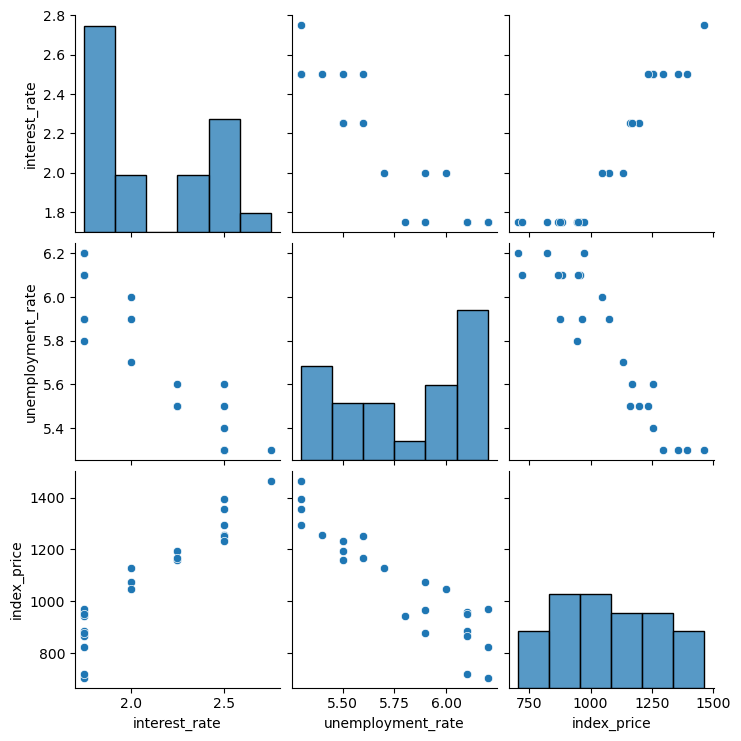

In [31]:
# Let's do some visualization
import seaborn as sns
sns.pairplot(df_index)

In [33]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

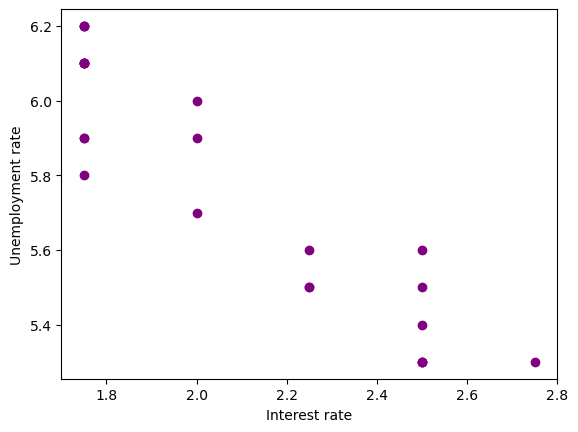

In [43]:
# Visualize the data points more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color='purple')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [51]:
# Independent and Dependent Features
X=df_index.iloc[::-1]
Y=df_index.iloc[:,-1]

In [53]:
X.head(),Y

(    interest_rate  unemployment_rate  index_price
 23           1.75                6.1          719
 22           1.75                6.2          704
 21           1.75                6.2          822
 20           1.75                5.9          876
 19           1.75                6.1          866,
 0     1464
 1     1394
 2     1357
 3     1293
 4     1256
 5     1254
 6     1234
 7     1195
 8     1159
 9     1167
 10    1130
 11    1075
 12    1047
 13     965
 14     943
 15     958
 16     971
 17     949
 18     884
 19     866
 20     876
 21     822
 22     704
 23     719
 Name: index_price, dtype: int64)

In [59]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [63]:
# Standardization
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [67]:
X_test=scaler.transform(X_test)

In [69]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

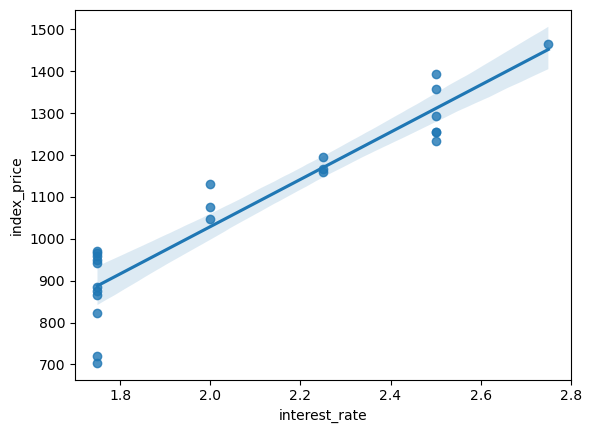

In [77]:
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

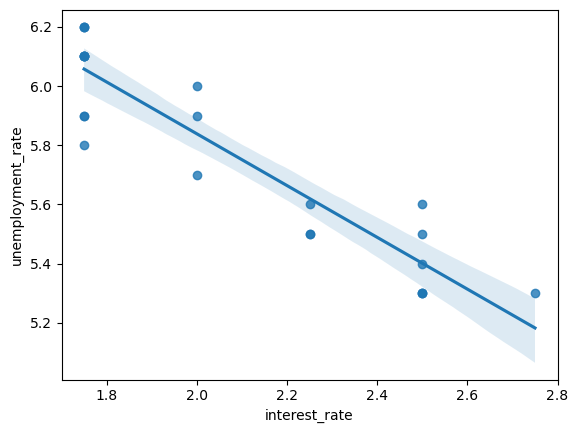

In [79]:
sns.regplot(x=df_index['interest_rate'],y=df_index['unemployment_rate'])

In [81]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [87]:
X_train # DataFrame is converted to 2D array

array([[-0.27393117, -0.14552138,  0.20216431],
       [-0.9783256 ,  1.30969238, -1.80067282],
       [ 1.1348577 , -1.30969238,  1.26940382],
       [-0.9783256 ,  1.01864963, -0.95440361],
       [-0.9783256 ,  1.30969238, -1.24589634],
       [-0.27393117,  0.43656413, -0.05641795],
       [ 0.43046326, -0.72760688,  0.33850768],
       [-0.9783256 ,  0.43656413, -0.99201557],
       [-0.9783256 ,  1.01864963, -1.03903053],
       [ 1.1348577 , -1.30969238,  1.44335915],
       [ 1.1348577 , -0.72760688,  0.69111986],
       [ 1.1348577 , -1.30969238,  0.9685081 ],
       [ 1.83925213, -1.30969238,  1.77246385],
       [-0.9783256 ,  1.30969238, -0.54537349],
       [-0.9783256 ,  0.43656413, -0.57358246],
       [ 0.43046326, -0.43656413,  0.37611965],
       [ 1.1348577 , -1.01864963,  0.79455276],
       [-0.9783256 ,  1.01864963, -0.64880639]])

In [89]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [103]:
regression.fit(X_train,Y_train)

LinearRegression()

In [105]:
# cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [107]:
np.mean(validation_score)

-2153.7833204114813

In [109]:
# prediction
y_pred = regression.predict(X_test)

In [111]:
y_pred

array([1139.55167179,  818.36520607, 1410.08845831,  803.33134969,
       1051.4551389 , 1097.87484192])

In [113]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [115]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6403.691870727683
66.55555555555561
80.02307086539282


In [123]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
print(score)
# display adjusted R-squared
print(1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.8097800303762298
0.5244500759405746


## Assumptions

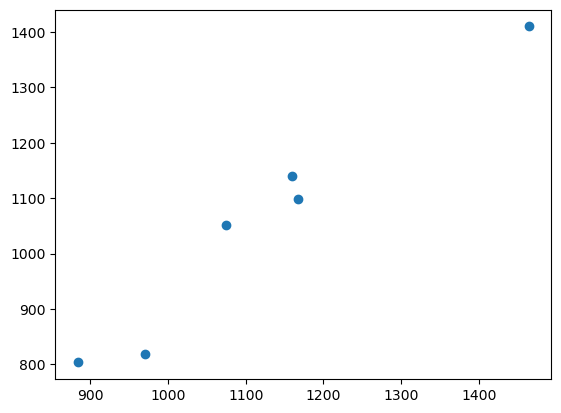

In [128]:
plt.scatter(Y_test,y_pred)
# If there is a linear relation between Y_test and y_pred, it means that the model has performed well.

In [130]:
residuals=Y_test-y_pred
print(residuals)

8      19.448328
16    152.634794
0      53.911542
18     80.668650
11     23.544861
9      69.125158
Name: index_price, dtype: float64


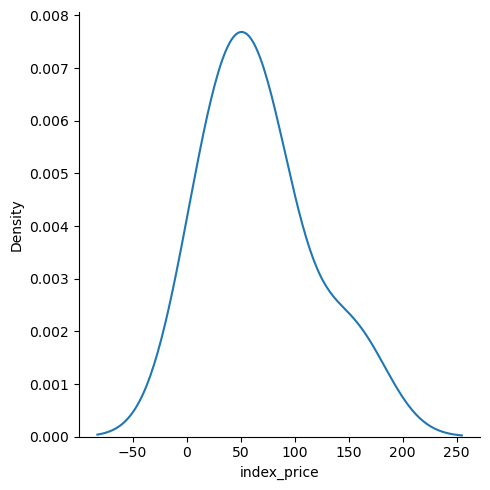

In [132]:
# Plot this residuals
sns.displot(residuals,kind="kde")
# It should give a normal distribution, if so then we can say that the model created is good...

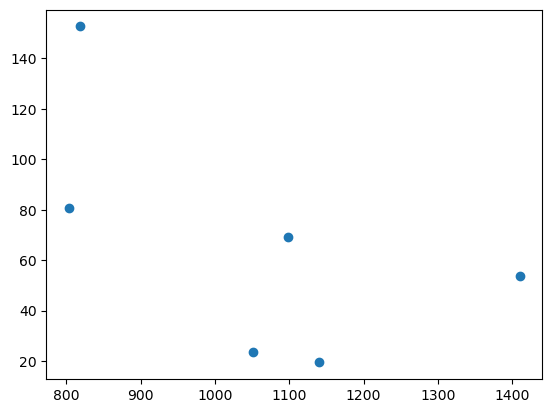

In [134]:
# Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)
# Here, if there is a uniform distributon then we can say that the model is performing well...

In [136]:
# OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(Y_train,X_train).fit()

In [138]:
model.summary()

C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.038
Model:                            OLS   Adj. R-squared (uncentered):             -0.155
Method:                 Least Squares   F-statistic:                             0.1956
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                       0.898
Time:                        14:23:42   Log-Likelihood:                         -150.83
No. Observations:                  18   AIC:                                      307.7
Df Residuals:                      15   BIC:                                      310.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            37.1806    995.893      0.037      0.971   -2085.515    2159.876
x2            46.1997    984.546      0.047      0.963   -2052.311    2144.711
x3          -199.5586    936.214     -0.213      0.834   -2195.052    1795.935
==============================================================================
Omnibus:                        3.316   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                1.395
Skew:                           0.261   Prob(JB):                        0.498
Kurtosis:                       1.740   Cond. No.                         7.69
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
print(regression.coef_)

[  37.18058763   46.19967288 -199.55861623]
